COHERENCE

Coherence is a concept defined for studying two signals, recorded simultaneously in one system (Bastos and Schoffelen, 2016) e.g., EEG signals recorded simultaneously at multiple electrodes. The coherence function is based on the Fourier transform. The term “coherence” is taken from the Latin word cohaerentia – it means natural or logical connection or consistency. The coherence function allows us to evaluate the similarity between the two signals, by analyzing their spectral properties and finding common frequencies. Mathematically, the coherence is the frequency domain parallel of the time domain cross-correlation function. Its squared value quantifies, as a function of frequency, the amount of variance in one of the signals that can be explained by the other signal, or vice-versa, in analogy to the squared correlation coefficient in the time domain. The coherence coefficient is a function of frequency - the same pair of signals can have different coherence across different frequency bands. Coherence coefficient is a normalized quantity bounded by 0 and 1, and is computed as:
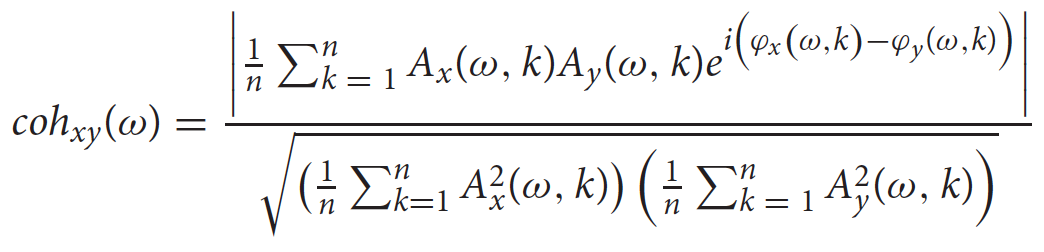

where the numerator term represents the length of the vector average of the individual trial cross-spectral densities between signal x and y at frequency ω, and the denominator represents the square root of the product of the average of the individual trial power estimates of signals x and y at frequency ω. As you scan see, two-dimensional complex numbers are used here to represent signals in the frequency domain.

The coherence can then be concisely
defined as:
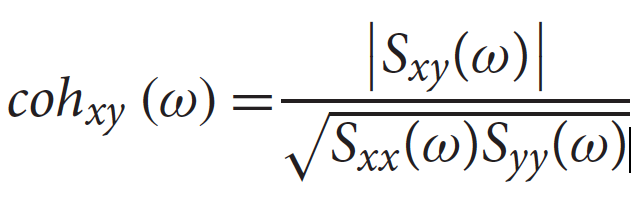

where the diagonal elements reflect the power estimates of signals x and y, and the off-diagonal elements reflect the averaged cross-spectral density terms.

The most popular method to implement the coherence coefficient between signals x and y is known as Welch method:

Cxy = abs(Sxy)^2/(Sxx*Syy), 
where Sxx and Syy are power spectral density estimates of x and y, and Sxy is the cross spectral density estimate between x and y

Although coherence is typically investigated in systems which have clear scpectral properties, such as oscillatory patterns in EEG datasets, coherence in well defined in all systems and can technically be computed in other datasets of poor time resolution such as fMRI datasets. This is not a common practice though. 

Below, you may find: 
[1] examples of coherence computed on an exemplary pair of synthetic signals x and y, computed with Welch method in scipy and pyplot,
[2] application to an exemplary EEG dataset,
[3] application to an exemplary fMRI dataset.

---------------------------
REFERENCES:

Bastos André M., Schoffelen Jan-Mathijs. "A Tutorial Review of Functional Connectivity Analysis Methods and Their Interpretational Pitfalls".Frontiers in Systems Neuroscience, VOLUME=9,YEAR=2016, PAGES=175, URL=https://www.frontiersin.org/article/10.3389/fnsys.2015.00175, DOI=10.3389/fnsys.2015.00175

In [1]:
# example of computing the coherence coefficient between two simulated signals, using the Welch method in scipy:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.coherence.html
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

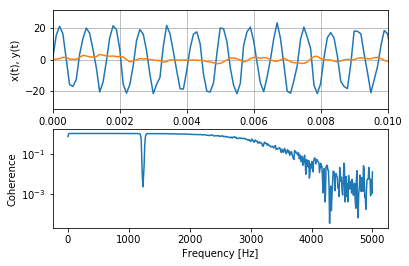

In [2]:
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

# compute the coherence function:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)

# plot the coherence function:
plt.subplot(211)
plt.plot(time, x, time, y)
plt.xlim(0, 0.01)
plt.xlabel('Time [s]')
plt.ylabel('x(t), y(t)')
plt.grid(True)

plt.subplot(212)
plt.semilogy(f, Cxy)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

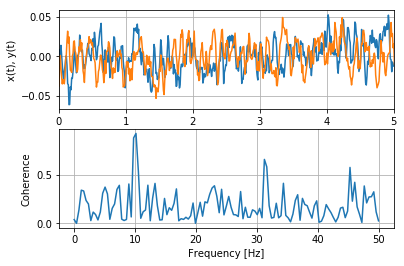

In [3]:
# [01] example of computing the coherence coefficient between two simulated signals, using the Welch method in pyplot:
# https://matplotlib.org/examples/pylab_examples/cohere_demo.html

import numpy as np
import matplotlib.pyplot as plt

# make a little extra space between the subplots
plt.subplots_adjust(wspace=5.0)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, t, s2)
plt.xlim(0, 5)
plt.xlabel('Time [s]')
plt.ylabel('x(t), y(t)')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.cohere(s1, s2, 256, 1./dt)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

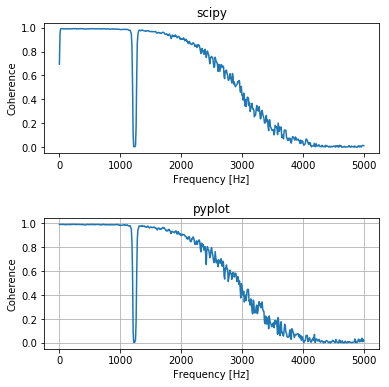

In [4]:
# comparison between the two implemntations (scipy vs pyplot):
fs = 10e3
plt.figure(figsize=(6,6))

plt.subplot(211)
f1, Cxy1 = signal.coherence(x, y, fs, nperseg=1024)
plt.plot(f1, Cxy1)
#plt.semilogy(f1, Cxy1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.title('scipy')

plt.subplot(212)
cxy2, f2 = plt.cohere(x, y, 1024,fs)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.title('pyplot')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [4]:
# [02] an example of a coherence computed on an exemplary EEG dataset:
# 5 sec of a two-channel EEG recording at the left and right frontal cortex of male adult WAG/Rij rats
# source: 
# https://vis.caltech.edu/~rodri/data.htm

# The reticular thalamic nucleus is involved in left-right EEG synchronization. 
# van Luijtelaar ELJM, Welting J and Quian Quiroga R. 
# in: Sleep-Wake research in the Netherlands. A. van Bemmel et al. (eds.), Dutch Society for Sleep-Wake Research, 2000.
    
import pandas as pd
df1  = pd.read_csv("rat_EEG_PFC_LR.csv")
data  = df1.values
print data.shape

(999, 2)


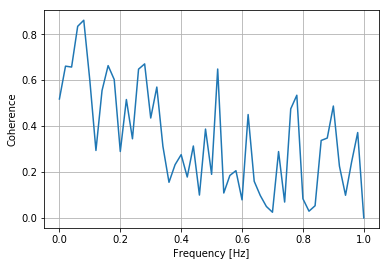

In [5]:
fs = 100
cxy, f = plt.cohere(data[:,0], data[:,1], fs)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

In [6]:
# [03] an example of a coherence computed on an exemplary fMRI dataset:
# source: http://nipy.org/nitime/examples/multi_taper_coh.html
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import scipy.stats.distributions as dist
from scipy import fftpack

import nitime
from nitime.timeseries import TimeSeries
from nitime import utils
import nitime.algorithms as alg
import nitime.viz
from nitime.viz import drawmatrix_channels
from nitime.analysis import CoherenceAnalyzer, MTCoherenceAnalyzer

In [9]:
data_path = os.path.join(nitime.__path__[0], 'data')

data_rec = csv2rec(os.path.join(data_path, 'fmri_timeseries.csv'))
print roi_names

TR = 1.89
f_ub = 0.15
f_lb = 0.02

roi_names = np.array(data_rec.dtype.names)
nseq = len(roi_names)
n_samples = data_rec.shape[0]
data = np.zeros((nseq, n_samples))

for n_idx, roi in enumerate(roi_names):
    data[n_idx] = data_rec[roi]

pdata = utils.percent_change(data)

[u'wm' u'vent' u'brain' u'lcau' u'lput' u'lthal' u'lfpol' u'lang'
 u'lsupram' u'lmtg' u'lhip' u'lpostphg' u'aphg' u'lamy' u'lparacing'
 u'lpcc' u'lprec' u'rcau' u'rput' u'rthal' u'rfpol' u'rang' u'rsupram'
 u'rmtg' u'rhip' u'rpostphg' u'rantphg' u'ramy' u'rparacing' u'rpcc'
 u'rprec']


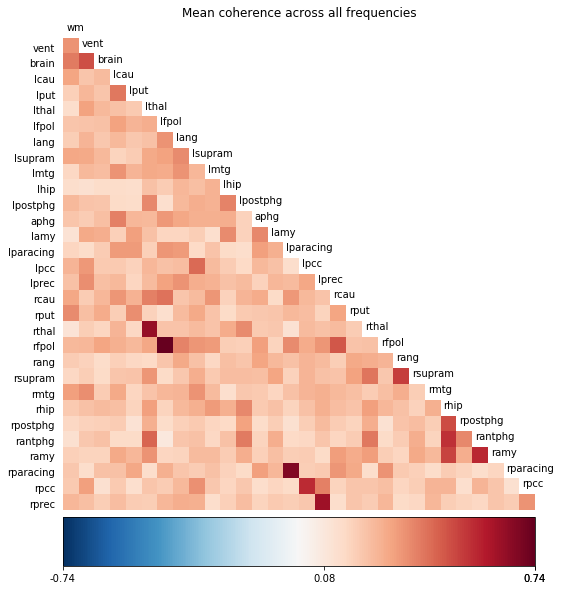

In [67]:
T = TimeSeries(pdata, sampling_interval=TR)
T.metadata['roi'] = roi_names

C3 = CoherenceAnalyzer(T)
freq_idx = np.where((C3.frequencies > f_lb) * (C3.frequencies < f_ub))[0]

#Extract the coherence and average across these frequency bands:
coh = np.mean(C3.coherence[:, :, freq_idx], -1)  # Averaging on the last dimension
fig03 = drawmatrix_channels(coh,
                            roi_names,
                            size=[10., 10.],
                            color_anchor=0,
                            title='Mean coherence across all frequencies')
plt.show()